In [36]:
    import cv2 #import OpenCV
    from matplotlib import pyplot as plt #import python plot graph
    import matplotlib as mpl #import math library from python
    import numpy as np

In [37]:
def get_figsize(im):
    # What size does the figure need to be in inches to fit the image?
    dpi = plt.rcParams['figure.dpi']
    dim = im.shape
    figuresize = dim[1]/float(dpi), dim[0]/float(dpi)
    return(figuresize)

In [38]:
def display_image_actual_size_single(im_data):
    figuresize = get_figsize(im_data)
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figuresize)
    # Add the single axis to fit the image to the screen boundary
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(im_data, cmap='gray')
    ax.axis('off')
    plt.show()
    return(fig)

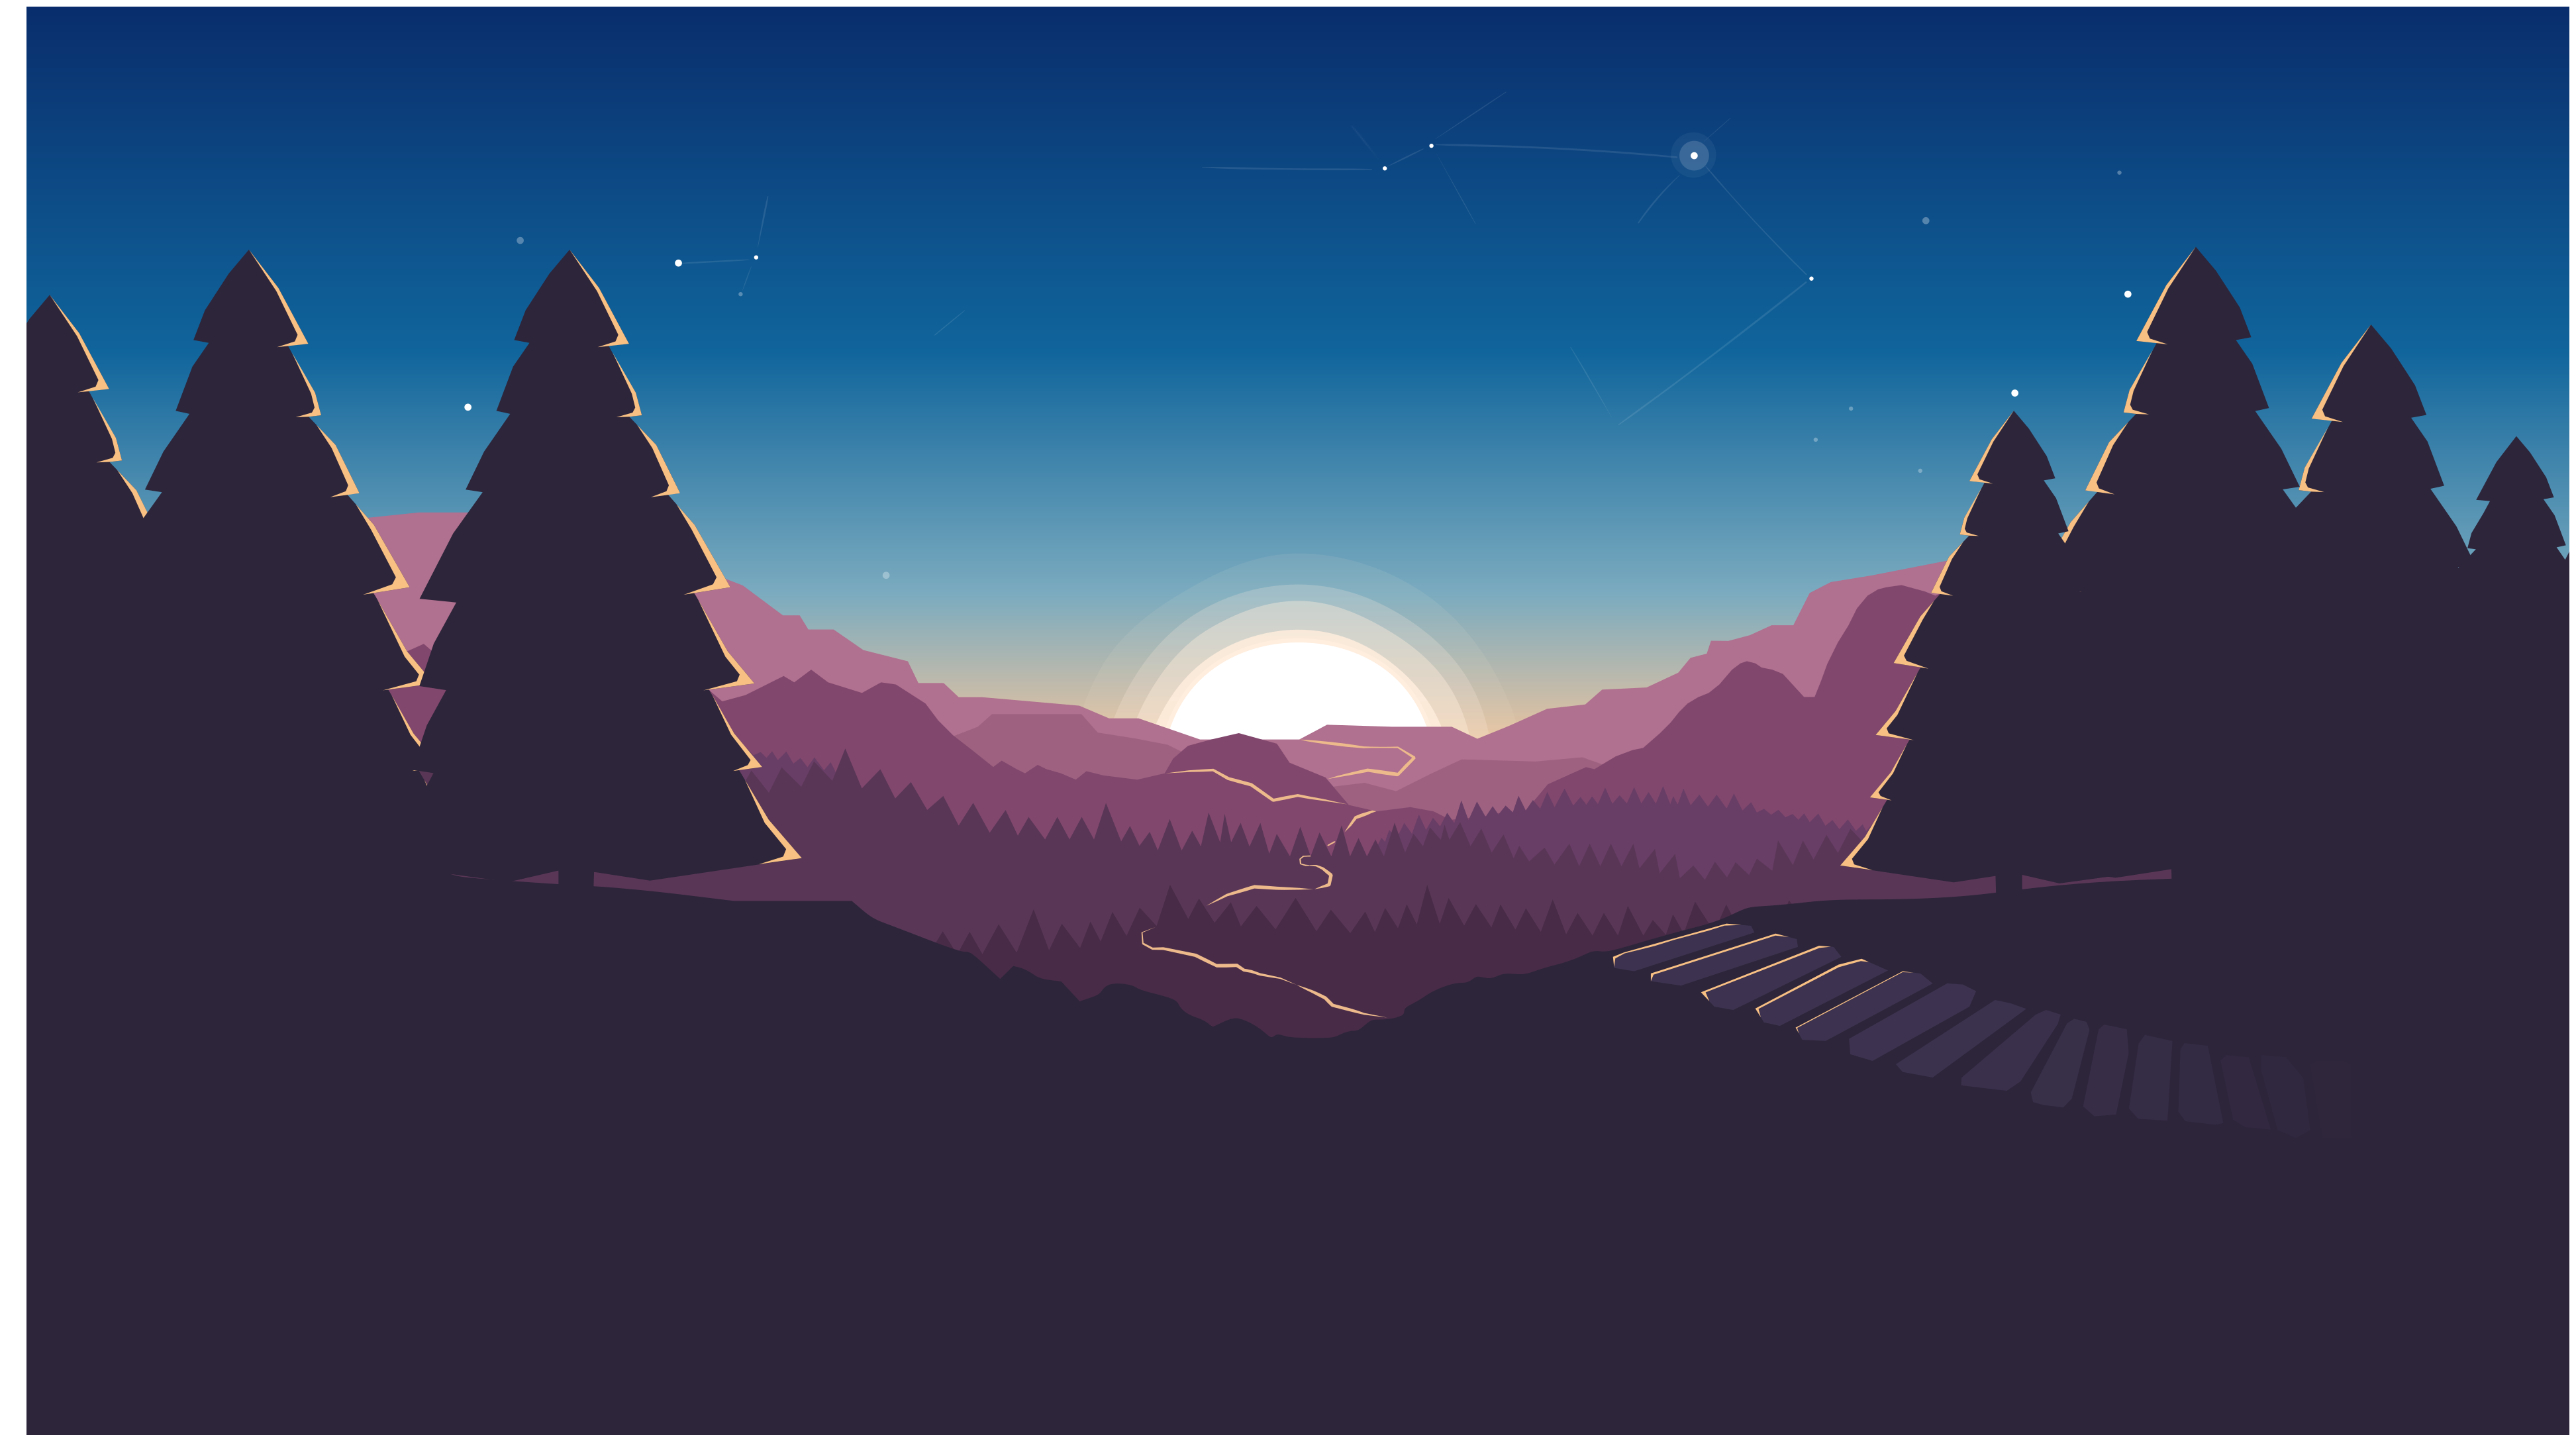

(2157, 3840, 3)


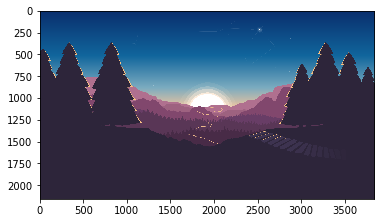

In [39]:
bg = cv2.imread('bg.jpg')
bg = cv2.cvtColor(bg,cv2.COLOR_BGR2RGB)
fig = display_image_actual_size_single(bg)
plt.imshow(bg)
print(bg.shape)

(765, 765, 3)


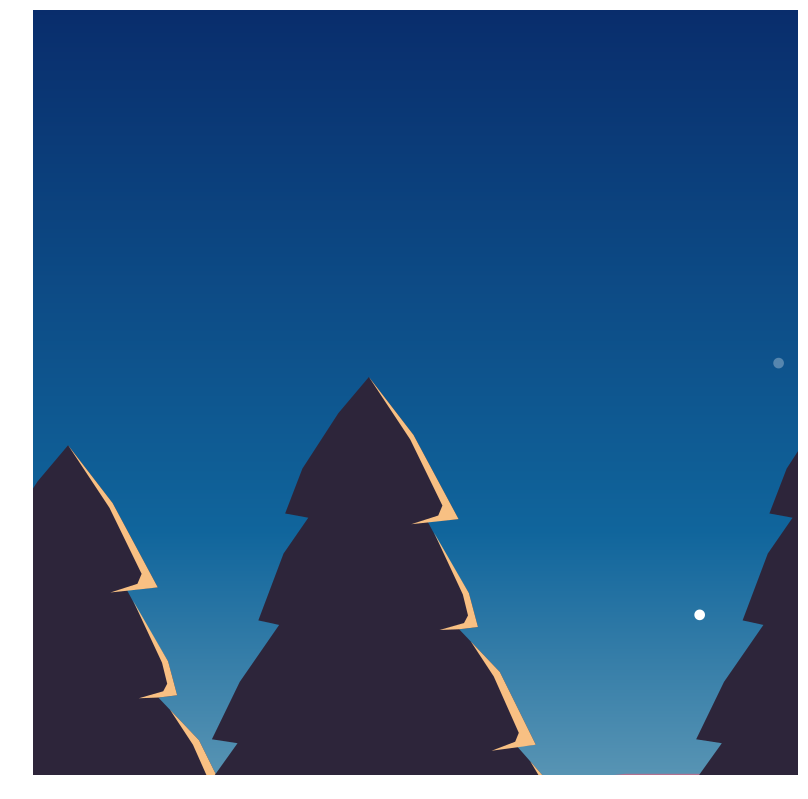

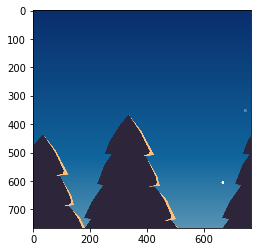

In [40]:
# Modify image by using 765 px/block
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi = bg[0:765, 0:765]  #cut from bg the roi of the same dimesions as fg
print(roi.shape)
fig = display_image_actual_size_single(roi)
plt.imshow(roi)

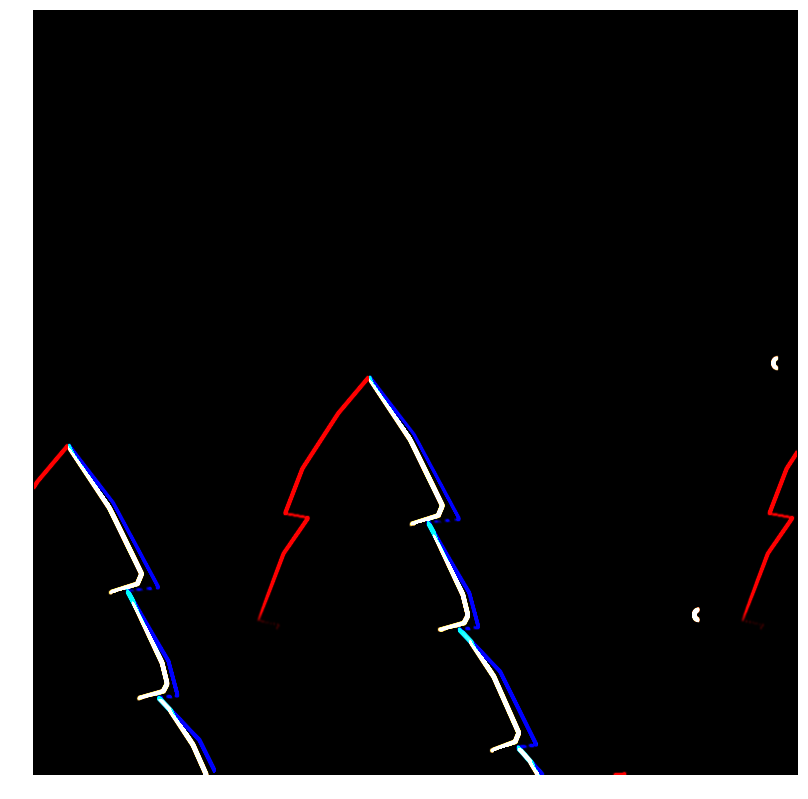

In [41]:
sobeledgeHV = cv2.Sobel(roi, -1, 1, 0, ksize=5)   #vertical edges, changes in the x direction
fig = display_image_actual_size_single(sobeledgeHV)

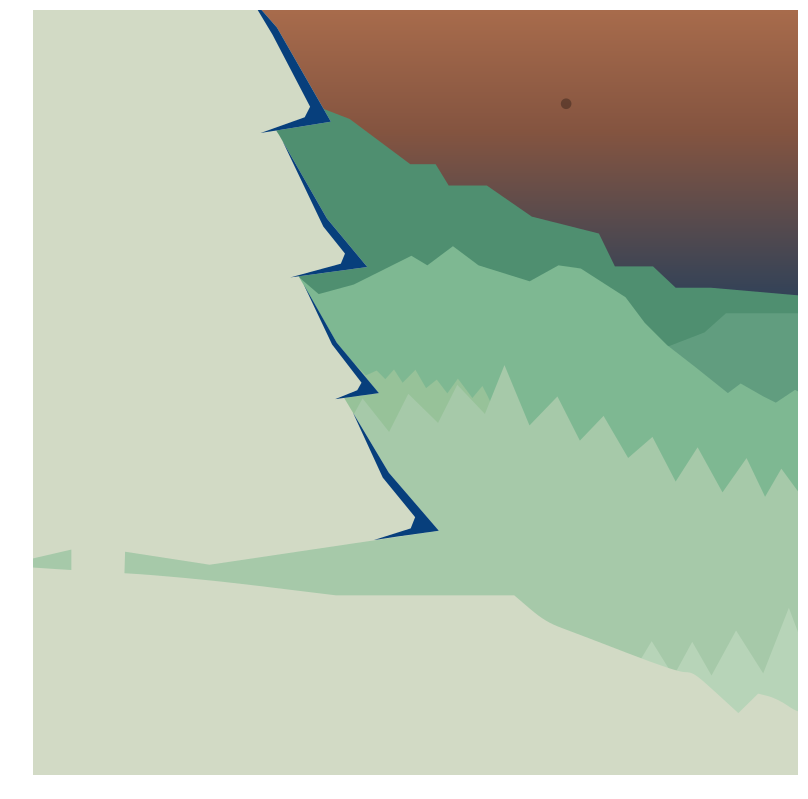

In [42]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi1 = bg[765:1530, 765:1530]  #cut from bg the roi of the same dimesions as fg
negative = np.ones(roi1.shape,dtype='uint8')
for i in np.arange(0,3):
    negative[:,:,i] = cv2.subtract(255,roi1[:,:,i])
fig = display_image_actual_size_single(negative)


(765, 765, 3)


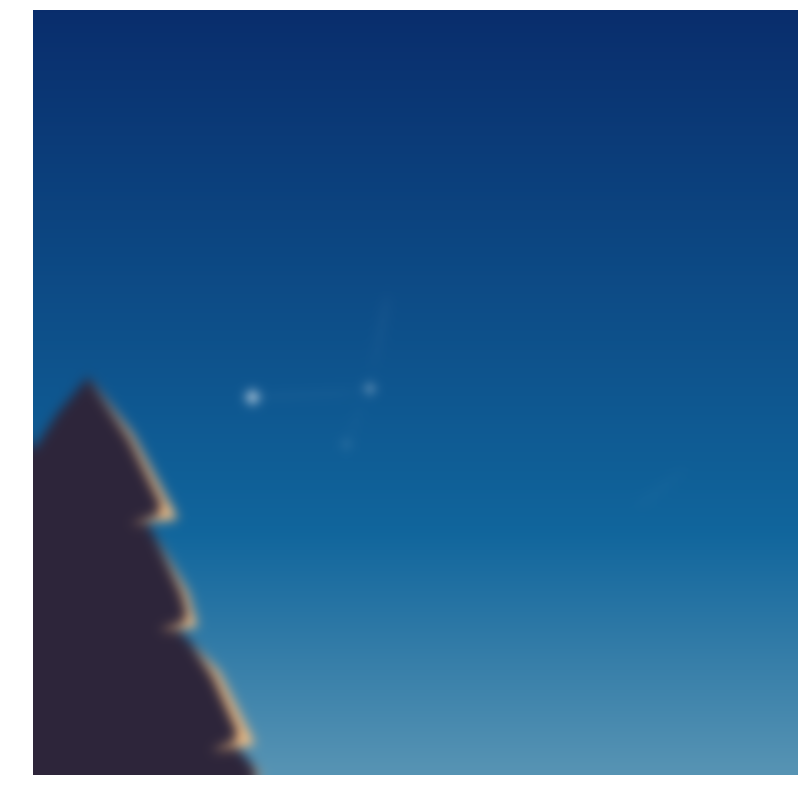

In [43]:
# Gaussian Blur Normally
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi3 = bg[0:765, 765:1530]  #cut from bg the roi of the same dimesions as fg
BlurGauss = cv2.GaussianBlur(roi3, (35,35), 0)
print(BlurGauss.shape)
fig = display_image_actual_size_single(BlurGauss)

(765, 765, 3)


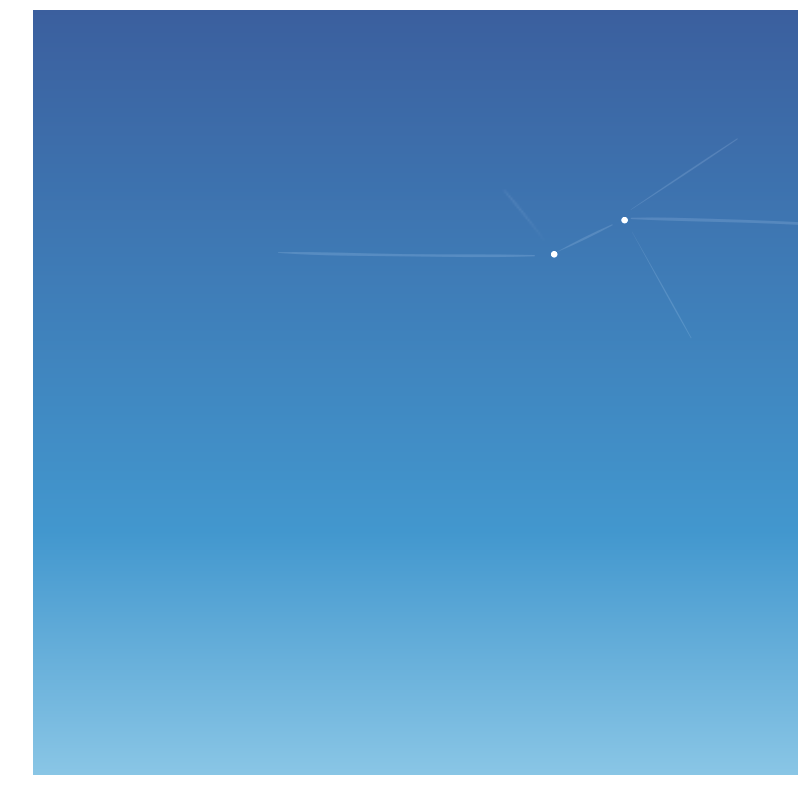

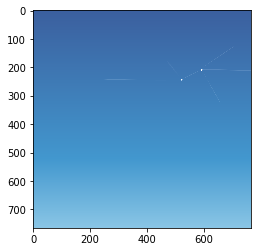

In [44]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi4 = bg[0:765, 1530:2295]  #cut from bg the roi of the same dimesions as fg
brighter = np.ones(roi4.shape,dtype='uint8') # for increase Brightness
for i in np.arange(0,3):
    brighter[:,:,i] = cv2.add(roi4[:,:,i], 50)
#     brighter2 = cv2.cvtColor(brighter,cv2.COLOR_BGR2RGB)
print(roi4.shape)
fig = display_image_actual_size_single(brighter)
plt.imshow(brighter)

In [45]:
def saltpepper_noise(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

(765, 765, 3)


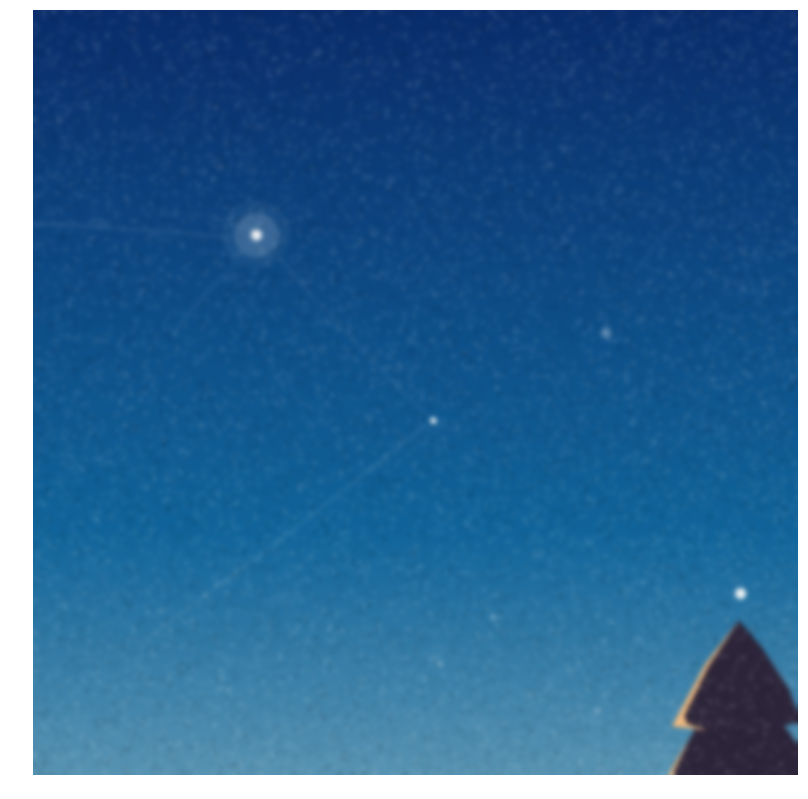

In [46]:
# GaussianBlur on S&P Filter
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi5 = bg[0:765, 2295:3060]  #cut from bg the roi of the same dimesions as fg
imSP1 = saltpepper_noise(roi5,0.0125)         #Add noise, 'prob' controls how much noise is added
BlurGauss2 = cv2.GaussianBlur(imSP1, (15,15), 0)
print(BlurGauss2.shape)
fig = display_image_actual_size_single(BlurGauss2)

(765, 765, 3)


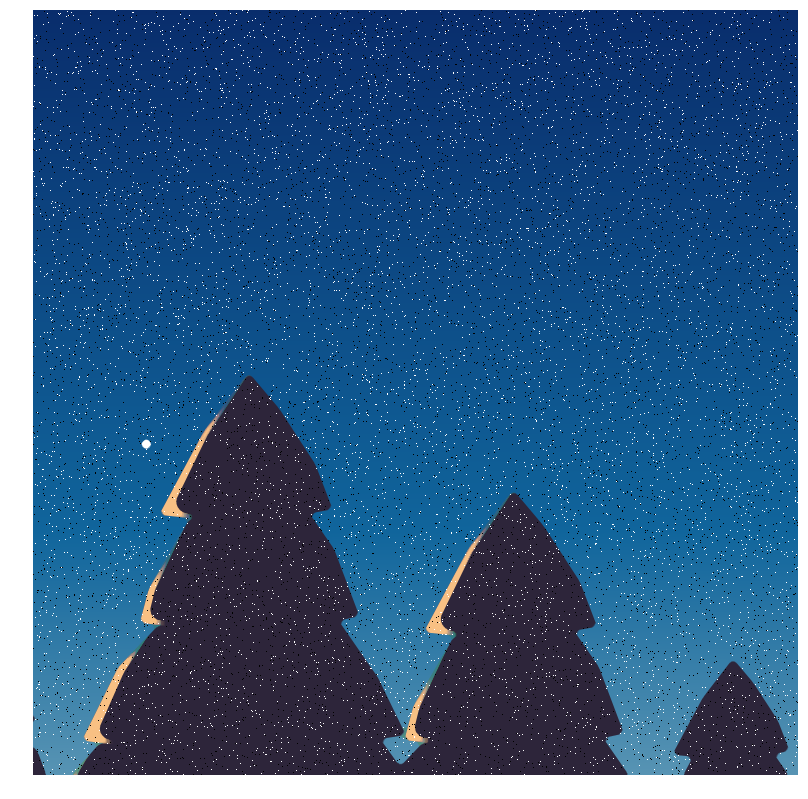

In [47]:
# Median Filter on S&P
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi5 = bg[0:765, 3060:3825]

medianFilteredimSP = cv2.medianBlur(roi5,9)   #Apply a median filter to of size ‘sz’
imSP2 = saltpepper_noise(medianFilteredimSP,0.0125)  
print(imSP2.shape)
fig = display_image_actual_size_single(imSP2)

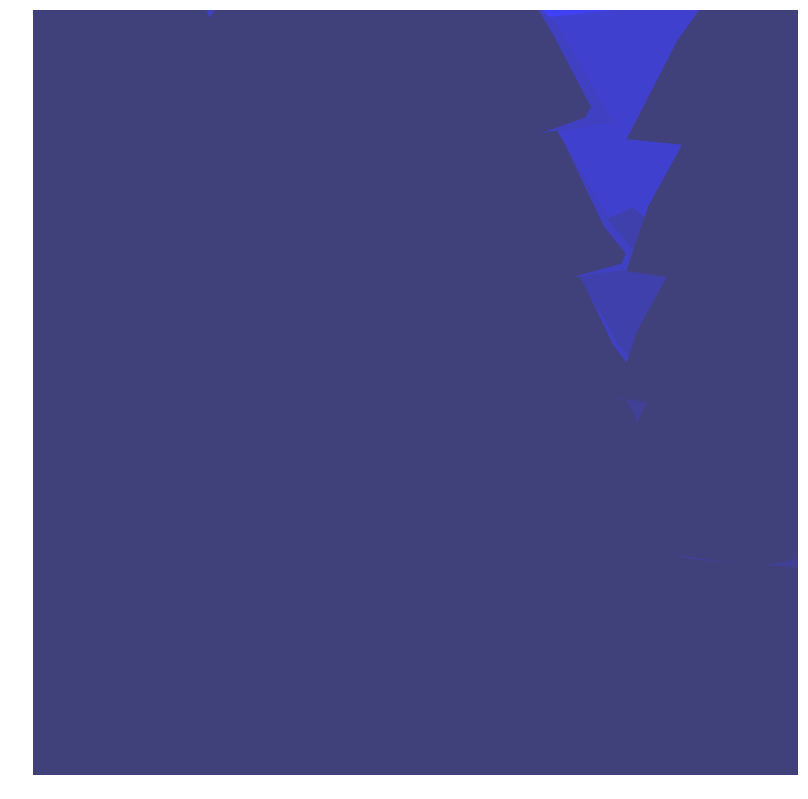

In [48]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg

roi6 = bg[765:1530,  0:765]
onecolorB = roi6.copy()
onecolorB[:,:,0] = 0
onecolorB[:,:,1] = 0
brighterB = np.ones(onecolorB.shape,dtype='uint8')
for i in np.arange(0,3):
    brighterB[:,:,i] = cv2.add(onecolorB[:,:,i], 64)
fig = display_image_actual_size_single(brighterB)

(765, 765, 3)


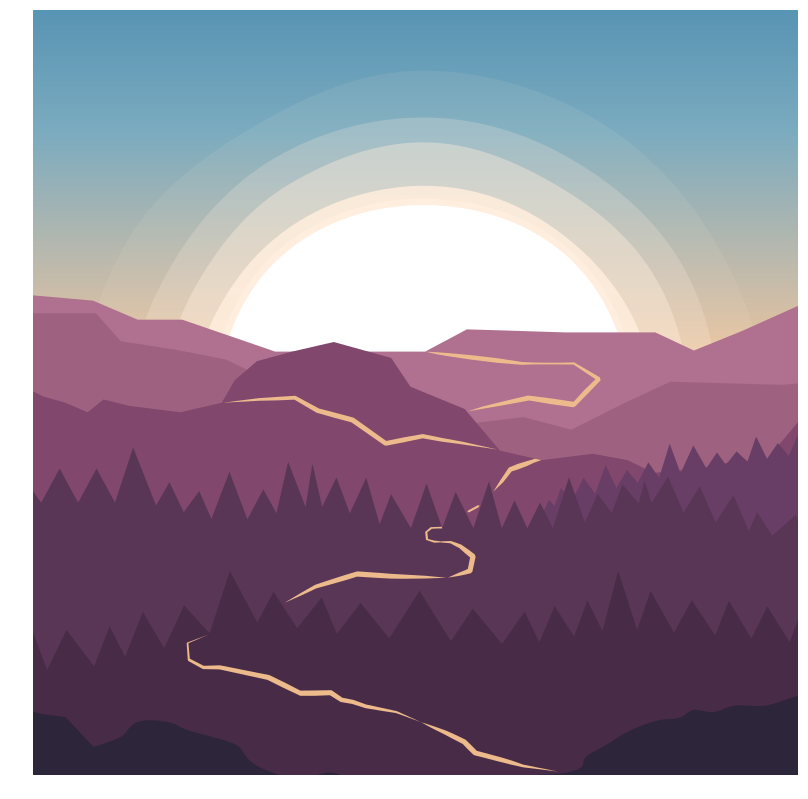

In [49]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi7 = bg[765:1530, 1530:2295]  #cut from bg the roi of the same dimesions as fg
print(roi.shape)
fig = display_image_actual_size_single(roi7)

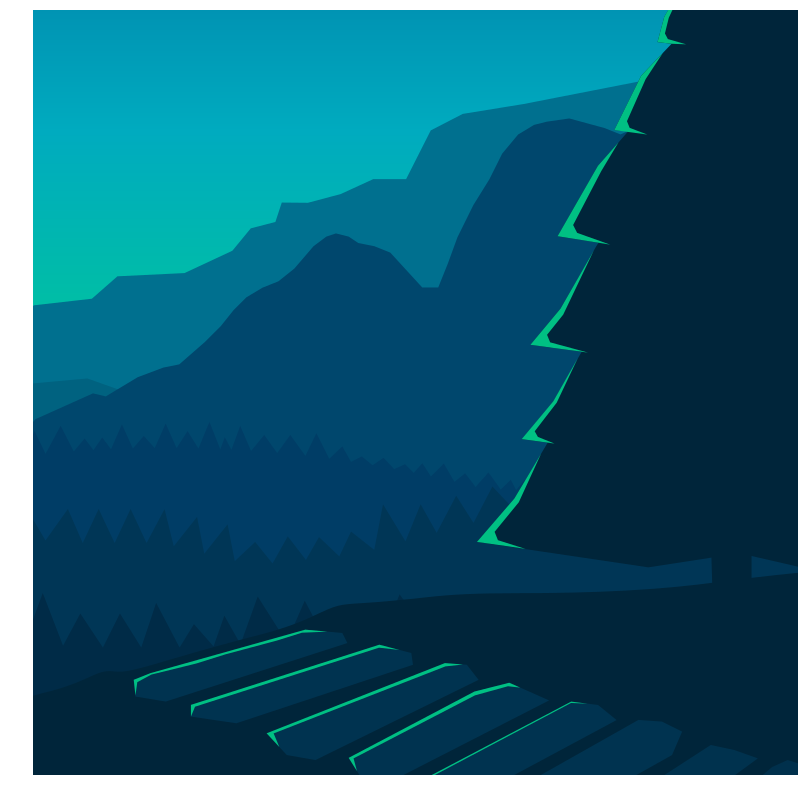

In [50]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi8 = bg[765:1530, 2295:3060]  #cut from bg the roi of the same dimesions as fg
onecolorRR = roi8.copy()
onecolorRR[:,:,0] = 0
onecolorRR[:,:,0] = 0
fig = display_image_actual_size_single(onecolorRR)

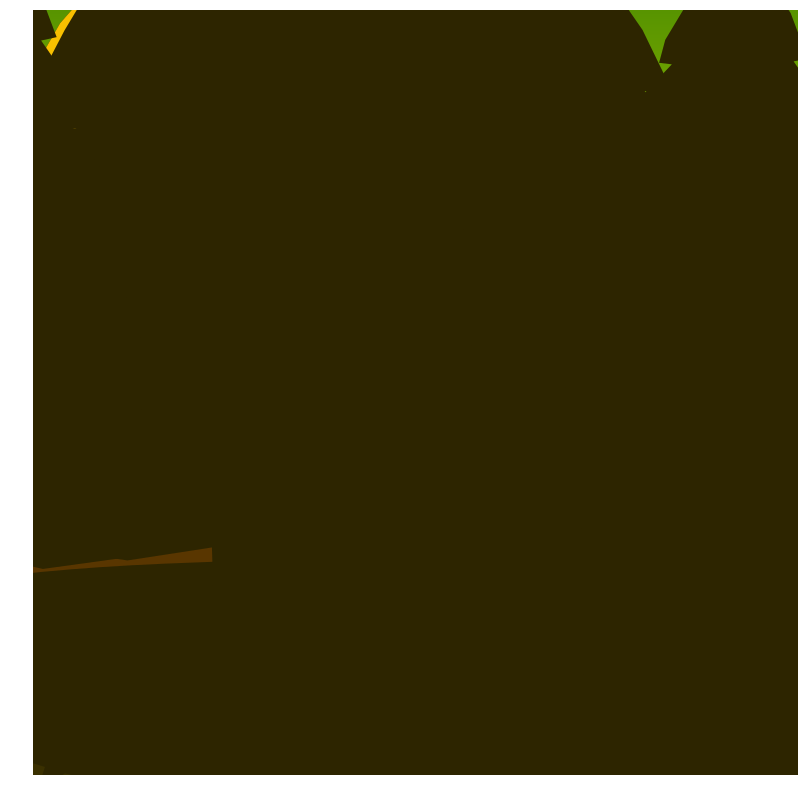

In [51]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi9 = bg[765:1530, 3060:3825] 
onecolorDD = roi9.copy()
onecolorDD[:,:,2] = 0
onecolorDD[:,:,2] = 0
fig = display_image_actual_size_single(onecolorDD)

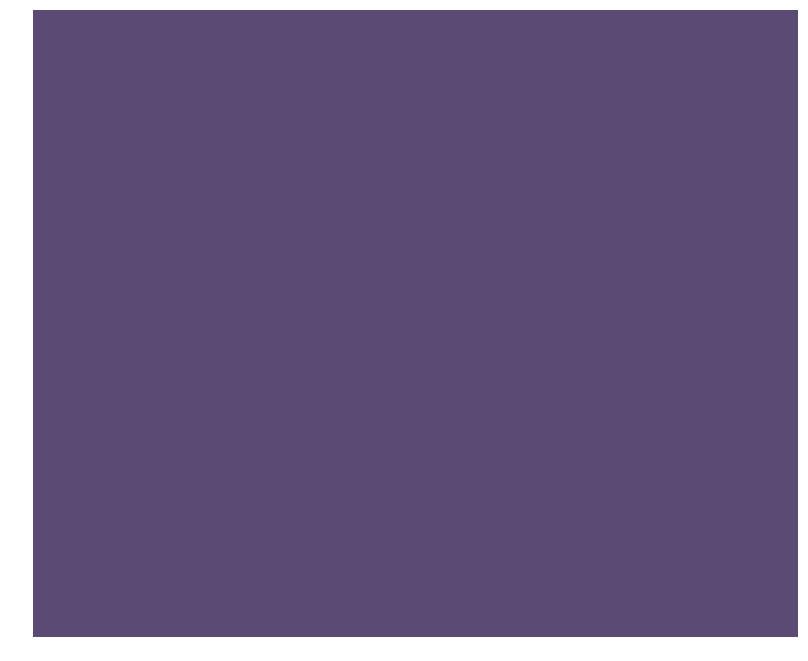

In [52]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi10 = bg[1530:2295, 0:765] 
Contrast = np.ones(roi10.shape,dtype='uint8')
for i in np.arange(0,3):
    Contrast[:,:,i] = cv2.multiply(2,roi10[:,:,i])
#Contrast = cv2.cvtColor(Contrast,cv2.COLOR_BGR2RGB)
fig = display_image_actual_size_single(Contrast)

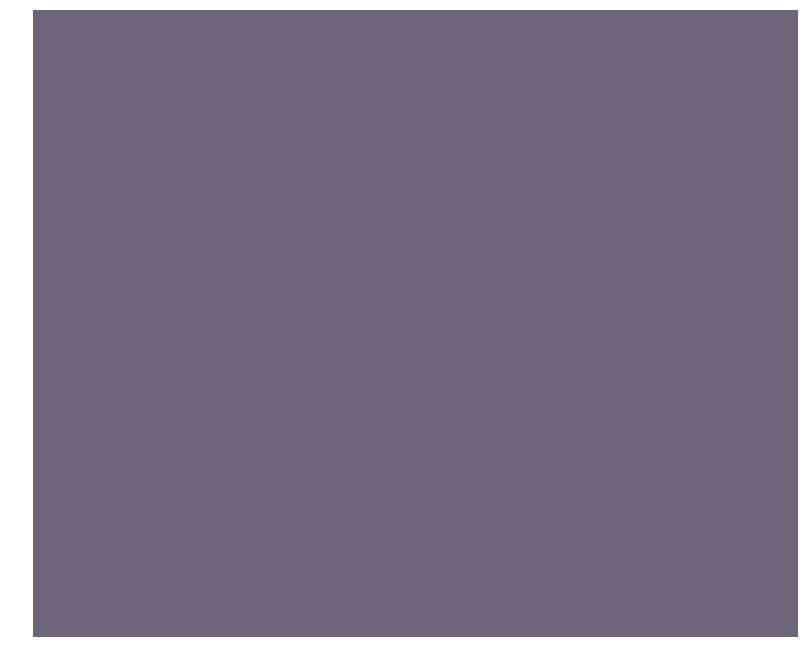

In [53]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi11 = bg[1530:2295, 765:1530] 
onecolorD = roi11.copy()
onecolorD[:,:,2] = 0
onecolorD[:,:,0] = 0
Decolor = cv2.cvtColor(roi11,cv2.COLOR_RGB2GRAY)
brighterG = np.ones(roi11.shape,dtype='uint8')
for i in np.arange(0,3):
    brighterG[:,:,i] = cv2.add(roi11[:,:,i], 64)
fig = display_image_actual_size_single(brighterG)

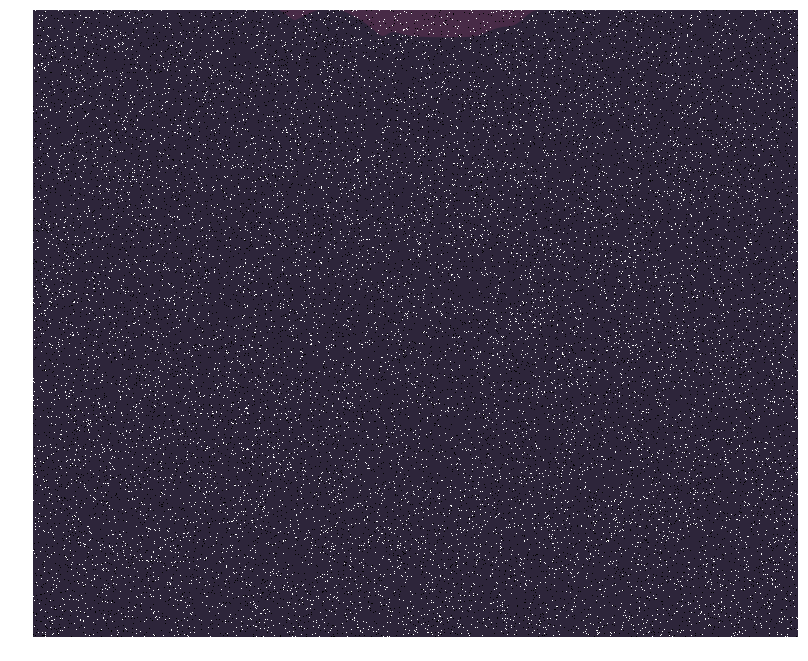

In [54]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi12 = bg[1530:2295, 1530:2295] 
imSP = saltpepper_noise(roi12,0.025) 
fig = display_image_actual_size_single(imSP)

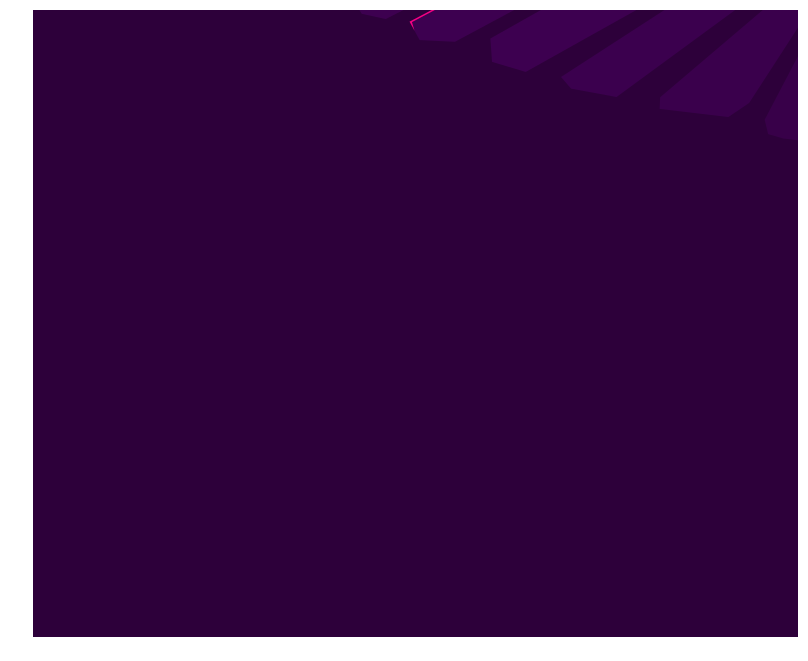

In [55]:
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi13 = bg[1530:2295, 2295:3060] 
onecolorRGB = roi13.copy()
onecolorRGB[:,:,1] = 0
onecolorRGB[:,:,1] = 0
fig = display_image_actual_size_single(onecolorRGB)

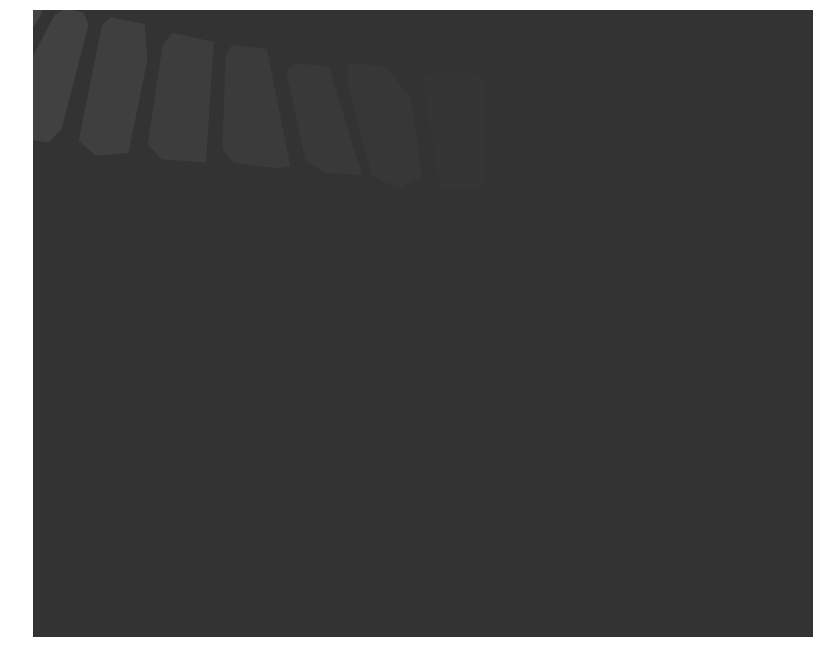

(627, 780, 3)


In [56]:
# Gray-Red Channel
rows, cols, channels = bg.shape       #get the width, the height, and the channels of fg
roi15 = bg[1530:2295, 3060:3850] 
# b,g,r = cv2.split(roi15)
roi15[:,:,2] = 0 # Select Red color from RGB Channel
a = cv2.cvtColor(roi15, cv2.COLOR_BGR2GRAY); # Now crop is grayscale CV_8UC1
b = cv2.cvtColor(a, cv2.COLOR_GRAY2BGR);  # Tempolary Reverse Image from GRAY2BGR = True Gray channel
lowercontrast = np.ones(b.shape,dtype='uint8')
for i in np.arange(0,3):
    lowercontrast[:,:,i] = cv2.divide(b[:,:,i],.525)
    
fig = display_image_actual_size_single(lowercontrast) # 32 is value for increase brightness to image processing
print(b.shape)

In [57]:
# # draw green text on the image
# output = image.copy()
# cv2.putText(output, "OMG", (10, 25), 
# 	cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
# cv2.imshow("Text", output)
# cv2.waitKey(0)

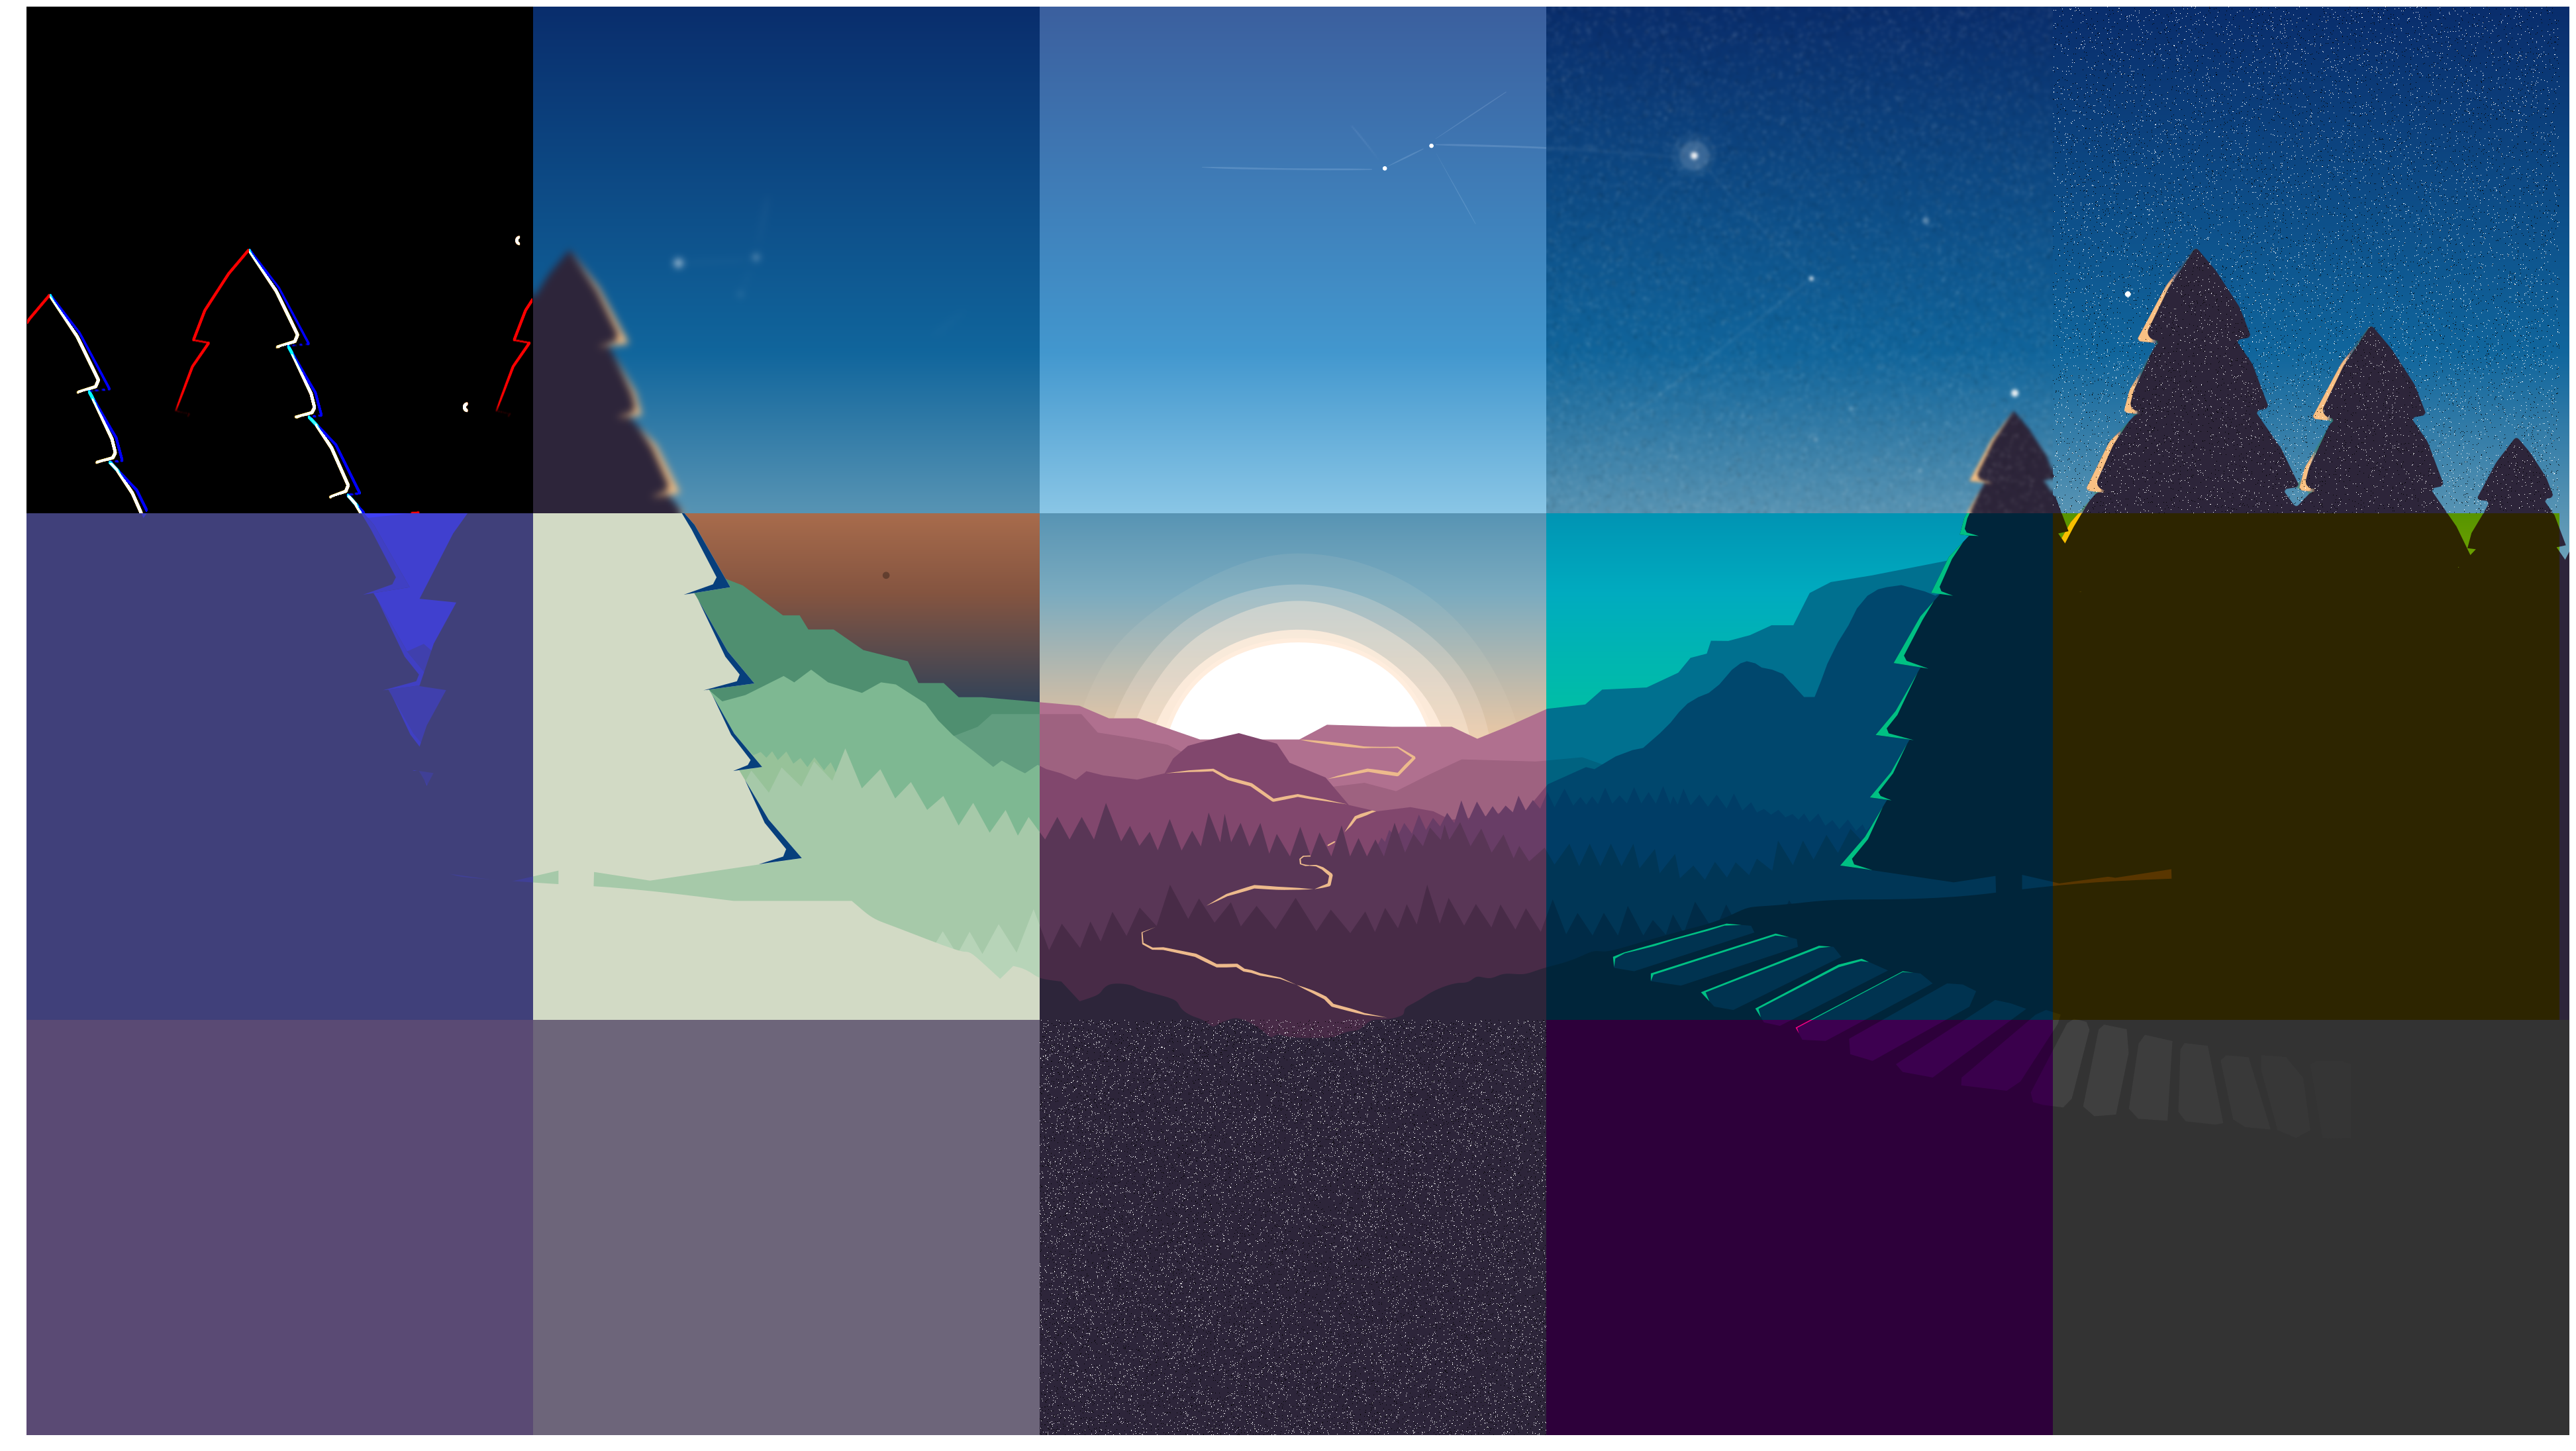

In [58]:
# Row 1

bg[0:765,  0:765 ] = sobeledgeHV # Sobel Edge Vertical Detector

bg[0:765, 765:1530] = BlurGauss # Gaussian Blur

bg[0:765, 1530:2295] = brighter # Brighter

bg[0:765, 2295:3060]  = BlurGauss2 # GaussianBlur on S&P 

bg[0:765, 3060:3825] = imSP2 # Median Filter on S&P 

# Row 2

bg[765:1530,  0:765] = brighterB # Blue Channel + Bright Algorithm

bg[765:1530,  765:1530 ] = negative # Negative Process

bg[765:1530, 1530:2295] = roi7 # Original Unprocess no compress or doing anything

bg[765:1530, 2295:3060] = onecolorRR #Blue-Green Process

bg[765:1530, 3060:3825] = onecolorDD #Green-Red Process

# Row 3

bg[1530:2295, 0:765] = Contrast # Higher Contrast

bg[1530:2295, 765:1530] = brighterG # Green Channel + Increase Brightness

bg[1530:2295, 1530:2295] = imSP # Salt & Pepper

bg[1530:2295, 2295:3060] = onecolorRGB #Red-Blue Process

bg[1530:2295, 3060:3850]  = lowercontrast # Gray-Red Channel with Decrease Contrast 

fig = display_image_actual_size_single(bg)

fig.savefig("Project_MM_6088130.jpg", bbox_inches='tight')